In [1]:
import Pkg; Pkg.add("Luxor")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [2]:
using Luxor

A function to draw one crossing, given a starting point, two direction vectors, two colors, and whether it's an S or Z type:

In [3]:
function crossing(start, vector0, vector1, (color0, color1, sz))
    if (sz == "Z")
        setcolor(color0)
        poly([start+vector0*(0, 0), start+vector0*(1, 1), start+vector0*(1, 1)+vector1, start+vector0*(0, 0)+vector1], 
            close=true,  :fill)
        setcolor(color1)
        poly([start+vector1*(0, 0), start+vector1*(1, 1), start+vector1*(1, 1)+vector0, start+vector1*(0, 0)+vector0], 
            close=true,  :fill)
        setcolor("black")
        poly([start+vector1*(0, 0), start+vector1*(1, 1), start+vector1*(1, 1)+vector0, start+vector1*(0, 0)+vector0], 
            close=true,  :stroke)
    elseif (sz == "S")
        setcolor(color1)
        poly([start+vector1*(0, 0), start+vector1*(1, 1), start+vector1*(1, 1)+vector0, start+vector1*(0, 0)+vector0], 
            close=true,  :fill)
        setcolor(color0)
        poly([start+vector0*(0, 0), start+vector0*(1, 1), start+vector0*(1, 1)+vector1, start+vector0*(0, 0)+vector1], 
            close=true,  :fill)
        setcolor("black")
        poly([start+vector0*(0, 0), start+vector0*(1, 1), start+vector0*(1, 1)+vector1, start+vector0*(0, 0)+vector1], 
            close=true,  :stroke)
    end
end

crossing (generic function with 1 method)

Given the size of a square grid, binary vectors indicating the colors of the threads on two sides, and the names of the colors, generate an array of information about the crossings:

In [4]:
function fillGrid(n, left, right, colors)
    grid = Array{String}(undef, 2n, 2n, 3)
    for i = 1:2n
        for j = 1:2n
            grid[i,j,1] = colors[left[((3i+j)÷2)%n+1]+1]
            grid[i,j,2] = colors[right[((3j+i)÷2)%n+1]+1]
            if (i+j) % 2 == 0
                grid[i,j,3] = "S"
            else 
                grid[i,j,3] = "Z"
            end
        end
    end
    print(makeLabel(n, left, right)*"\n")
    return grid
end

fillGrid (generic function with 1 method)

Given the array of information produced by `fillGrid`, draw the grid:

In [5]:
function drawGrid(n, grid, start, vector0, vector1)

if grid != nothing
    for i = -n÷2:3*n÷2
        for j = max(-i, i-n+1):min(2*n-i, i+n)
            crossing(start+vector0*(i,i)+vector1*(j,j), vector0, vector1, Tuple(grid[(i+16*n)%2n+1,(j+16*n)%2n+1,:]))
        end
    end
end
end            

drawGrid (generic function with 1 method)

Label the grid by listing the thread numbers (between 1 and 16) which have color A:

In [6]:
function makeLabel(n, odds, evens)
     string(join([odds[i]==1 ? string(2*n+1 - 2*i, ".") : "" for i=n:-1:1]), "/", 
        join([evens[i]==1 ? string(2*i, ".") : "" for i=1:n]))
end


makeLabel (generic function with 1 method)

The list of bracelets up to equivalence, organized by the number of spots they generate in the braid.  Comments indicate the symmetries present without and with colors swapped.

In [7]:
oddbracelets =
# 0 spots:
[[0 0 0 0 0 0 0 0],  #mirror
# 4 spots:
[0 0 0 0 0 0 0 1],   #mirror
# 8 spots:
[0 0 0 0 0 0 1 1     #glide
0 0 0 0 0 1 0 1      #mirror
0 0 0 0 1 0 0 1      #glide
0 0 0 1 0 0 0 1],    #mirror
# 12 spots:
[0 0 0 0 0 1 1 1  #mirror
0 0 0 0 1 0 1 1  #none
0 0 0 1 0 0 1 1    #none
0 0 0 1 0 1 0 1 #mirror
0 0 1 0 0 1 0 1],   #mirror
# 16 spots:   
[0 0 0 0 1 1 1 1     #glide #colorchangeglide
 0 0 0 1 0 1 1 1         #none #colorchangeglide
 0 0 0 1 1 0 1 1      #mirror
 0 0 1 0 0 1 1 1     #mirror
 0 0 1 0 1 0 1 1        #none #colorchangeglide
 0 0 1 0 1 1 0 1     #glide #colorchange
 0 0 1 1 0 0 1 1     #glide #colorchange
 0 1 0 1 0 1 0 1],   #mirror #colorchange
# 20 spots:
[0 0 0 1 1 1 1 1    #mirror
 0 0 1 0 1 1 1 1      #none
 0 0 1 1 0 1 1 1       #none
 0 1 0 1 0 1 1 1   #mirror
 0 1 0 1 1 0 1 1],     #mirror    
# 24 spots:
[0 0 1 1 1 1 1 1  #glide
 0 1 0 1 1 1 1 1   #mirror
 0 1 1 0 1 1 1 1    #glide
 0 1 1 1 0 1 1 1], #mirror
# 28 spots:
[0 1 1 1 1 1 1 1], #mirror
# 32 spots:
[1 1 1 1 1 1 1 1]] #mirror


9-element Vector{Matrix{Int64}}:
 [0 0 … 0 0]
 [0 0 … 0 1]
 [0 0 … 1 1; 0 0 … 0 1; 0 0 … 0 1; 0 0 … 0 1]
 [0 0 … 1 1; 0 0 … 1 1; … ; 0 0 … 0 1; 0 0 … 0 1]
 [0 0 … 1 1; 0 0 … 1 1; … ; 0 0 … 1 1; 0 1 … 0 1]
 [0 0 … 1 1; 0 0 … 1 1; … ; 0 1 … 1 1; 0 1 … 1 1]
 [0 0 … 1 1; 0 1 … 1 1; 0 1 … 1 1; 0 1 … 1 1]
 [0 1 … 1 1]
 [1 1 … 1 1]

Numeric codes for the types of symmetries present in the previous list:

In [8]:
oddsymmtypes = [[1],  #mirror
#
[1],   #mirror
#
[-1      #glide
1    #mirror
-1    #glide
1],      #mirror
#
[1  #mirror
0     #none
0  #none
1 #mirror
1],   #mirror
#    
[-1     #glide #colorchangeglide
 0         #none #colorchangeglide
 1      #mirror
 1     #mirror
 0       #none #colorchangeglide
 -1     #glide #colorchange
 -1     #glide #colorchange
 1],   #mirror #colorchange
#
[1  #mirror
0     #none
0  #none
1 #mirror
1],   #mirror
#
[-1      #glide
1    #mirror
-1    #glide
1],      #mirror
[1],   #mirror
#
[1]] #mirror

9-element Vector{Vector{Int64}}:
 [1]
 [1]
 [-1, 1, -1, 1]
 [1, 0, 0, 1, 1]
 [-1, 0, 1, 1, 0, -1, -1, 1]
 [1, 0, 0, 1, 1]
 [-1, 1, -1, 1]
 [1]
 [1]

The list of bracelets used for the other side of the grid has more than one representative for some equivalence classes, to account for the "additions" (a) and (c) described in https://joshuarbholden.github.io/kumihimo/inventory.html.

In [9]:
evenbracelets =
# 0 spots:
[[0 0 0 0 0 0 0 0],  #mirror
# 4 spots:
[0 0 0 0 0 0 0 1   #mirror
0 0 0 0 0 0 1 0   #mirror shifted
0 0 0 0 0 1 0 0   #mirror shifted2
0 0 0 0 1 0 0 0],   #mirror shifted3
# 8 spots:
[0 0 0 0 0 0 1 1     #glide
0 0 0 0 0 1 0 1      #mirror
0 0 0 0 1 0 0 1      #glide
0 0 0 1 0 0 0 1    #mirror
0 0 0 0 0 1 1 0    #glide shifted
0 0 0 0 1 0 1 0     #mirror shifted
0 0 0 1 0 0 1 0     #glide shifted
0 1 0 0 0 1 0 0   #mirror  shifted
0 0 0 0 1 1 0 0   #glide shifted2
0 0 0 1 0 1 0 0    #mirror shifted2
0 0 1 0 0 1 0 0    #glide shifted2
0 1 0 0 0 1 0 0   #mirror  shifted2  
0 0 0 1 1 0 0 0   #glide shifted3
0 0 1 0 1 0 0 0   #mirror shifted3
0 1 0 0 1 0 0 0   #glide shifted3
1 0 0 0 1 0 0 0],   #mirror  shifted3     
# 12 spots:
[0 0 0 0 0 1 1 1  #mirror
0 0 0 0 1 0 1 1  #none
0 0 0 0 1 1 0 1  #none, reverse of earlier   
0 0 0 1 0 0 1 1    #none
0 0 0 1 0 1 0 1 #mirror
0 0 0 1 1 0 0 1  #none, reverse of earlier         
0 0 1 0 0 1 0 1  #mirror
0 0 0 0 1 1 1 0  #mirror shifted
0 0 0 1 0 1 1 0  #none shifted
0 0 0 1 1 0 1 0  #none, reverse of earlier shifted   
0 0 1 0 0 1 1 0     #none shifted
0 0 1 0 1 0 1 0 #mirror shifted
0 0 1 1 0 0 1 0   #none, reverse of earlier shifted        
0 1 0 0 1 0 1 0],  #mirror shifted      
# 16 spots:   
[0 0 0 0 1 1 1 1     #glide #colorchangeglide
 0 0 0 1 0 1 1 1         #none #colorchangeglide
 0 0 0 1 1 0 1 1      #mirror
 0 0 0 1 1 1 0 1 #none, reverse of earlier   
#0 0 1 0 0 1 1 1     #mirror is cc of previous
 0 0 1 0 1 0 1 1        #none #colorchangeglide
 0 0 1 0 1 1 0 1     #glide #colorchange
 0 0 1 1 0 0 1 1     #glide #colorchange
 0 0 1 1 0 1 0 1 #none, reverse of earlier          
 0 1 0 1 0 1 0 1],   #mirror #colorchange
# 20 spots:
[0 0 0 1 1 1 1 1    #mirror
 0 0 1 0 1 1 1 1      #none
 0 0 1 1 0 1 1 1       #none
 0 0 1 1 1 0 1 1       #none, reverse of earlier
 0 0 1 1 1 1 0 1      #none, reverse of earlier
 0 1 0 1 0 1 1 1   #mirror
 0 1 0 1 1 0 1 1],   #mirror    
# 24 spots:
[0 0 1 1 1 1 1 1  #glide
 0 1 0 1 1 1 1 1   #mirror
 0 1 1 0 1 1 1 1    #glide
 0 1 1 1 0 1 1 1], #mirror
# 28 spots:
[0 1 1 1 1 1 1 1], #mirror
# 32 spots:
[1 1 1 1 1 1 1 1]] #mirror


9-element Vector{Matrix{Int64}}:
 [0 0 … 0 0]
 [0 0 … 0 1; 0 0 … 1 0; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 1 1; 0 0 … 0 1; … ; 0 1 … 0 0; 1 0 … 0 0]
 [0 0 … 1 1; 0 0 … 1 1; … ; 0 0 … 1 0; 0 1 … 1 0]
 [0 0 … 1 1; 0 0 … 1 1; … ; 0 0 … 0 1; 0 1 … 0 1]
 [0 0 … 1 1; 0 0 … 1 1; … ; 0 1 … 1 1; 0 1 … 1 1]
 [0 0 … 1 1; 0 1 … 1 1; 0 1 … 1 1; 0 1 … 1 1]
 [0 1 … 1 1]
 [1 1 … 1 1]

Likewise there are some extra symmetry codes denoting which items in the previous list are duplicates and which symmetry makes them equivalent:

In [10]:
evensymmtypes = [[1],  #mirror
#4 spots
[1    #mirror
2   #mirror shifted
2   #mirror shifted2
2],   #mirror shifted3
#8 spots
[-1      #glide
1    #mirror
-1    #glide
1      #mirror
-2      #glide shifted
2    #mirror shifted
-2    #glide shifted
2      #mirror shifted
-2      #glide shifted2
2    #mirror shifted2
-2    #glide shifted2
2      #mirror shifted2
-2      #glide shifted3
2    #mirror shifted3
-2    #glide shifted3
2],      #mirror shifted3
#12 spots
[1  #mirror
0     #none
1000  #none, reverse of earlier
0     #none
1 #mirror 
1000  #none, reverse of earlier 
1   #mirror 
2  #mirror shifted
0     #none shifted
2000  #none, reverse of earlier shifted
0     #none shifted
2 #mirror shifted
2000  #none, reverse of earlier shifted
2],   #mirror shifted       
#16 spots    
[-1     #glide #colorchangeglide
 0         #none #colorchangeglide
 1      #mirror
 1000 #none, reverse of earlier   
#1     #mirror is cc of previous
 0        #none #colorchangeglide
 -1    #glide #colorchange
 -1     #glide #colorchange
1000 #none, reverse of earlier          
 1],   #mirror #colorchange
#20 spots
[1  #mirror
0     #none
0  #none
1000     #none, reverse of earlier
1000  #none, reverse of earlier
1 #mirror
1],   #mirror
#
[-1      #glide
1    #mirror
-1    #glide
1],      #mirror
[1],   #mirror
#
[1]] #mirror

9-element Vector{Vector{Int64}}:
 [1]
 [1, 2, 2, 2]
 [-1, 1, -1, 1, -2, 2, -2, 2, -2, 2, -2, 2, -2, 2, -2, 2]
 [1, 0, 1000, 0, 1, 1000, 1, 2, 0, 2000, 0, 2, 2000, 2]
 [-1, 0, 1, 1000, 0, -1, -1, 1000, 1]
 [1, 0, 0, 1000, 1000, 1, 1]
 [-1, 1, -1, 1]
 [1]
 [1]

Each cell of Table 3 is now drawn in a separate code block.  The `if` statements account for the "exceptions" (b) and (d) described in https://joshuarbholden.github.io/kumihimo/inventory.html.

The zero-spot column, because, you know

In [30]:
makeLabel(8, oddbracelets[1+1][1, :], 
                    reverse(evenbracelets[1+1][1, :]))

"1./2."

/


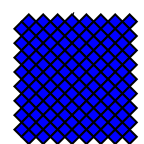

In [11]:
using Luxor
@svg begin
    left = 0
    right = 0
    fontsize(14)
    origin(0,0)
    tiles = Partition(2inch, 2inch, 2inch, 2inch)
    for (pos, i) in tiles
        origin()
        translate(pos)
        if (oddsymmtypes[left+1][tiles.currentrow]*evensymmtypes[right+1][tiles.currentcol] != -2)
            setcolor("black")
            label(makeLabel(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :])), 
                :N, O-(0, 0.6inch))
            grid= fillGrid(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :]), ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
         end
     end
    end 2inch 2inch

1./


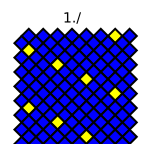

In [39]:
using Luxor
@svg begin
    left = 1
    right = 0
    fontsize(14)
    origin(0,0)
    tiles = Partition(2inch, 2inch, 2inch, 2inch)
    for (pos, i) in tiles
        origin()
        translate(pos)
        if (oddsymmtypes[left+1][tiles.currentrow]*evensymmtypes[right+1][tiles.currentcol] != -2)
            setcolor("black")
            label(makeLabel(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :])), 
                :N, O-(0, 0.6inch))
            grid= fillGrid(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :]), ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.6inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
         end
     end
    end 2inch 2inch

1.3./
1.5./
1.7./
1.9./


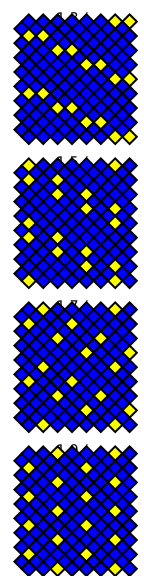

In [12]:
using Luxor
@svg begin
    left = 2
    right = 0
    fontsize(14)
    origin(0,0)
    tiles = Partition(2inch, 8inch, 2inch, 2inch)
    for (pos, i) in tiles
        origin()
        translate(pos)
        if (oddsymmtypes[left+1][tiles.currentrow]*evensymmtypes[right+1][tiles.currentcol] != -2)
            setcolor("black")
            label(makeLabel(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :])), 
                :N, O-(0, 0.6inch))
            grid= fillGrid(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :]), ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
         end
     end
    end 2inch 8inch

1.3.5./
1.3.7./
1.3.9./
1.5.9./
1.5.11./


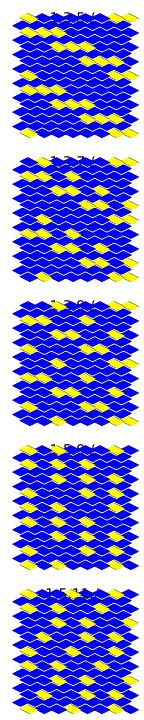

In [14]:
using Luxor
@svg begin
    left = 3
    right = 0
    fontsize(14)
    origin(0,0)
    tiles = Partition(2inch, 10inch, 2inch, 2inch)
    for (pos, i) in tiles
        origin()
        translate(pos)
        if (oddsymmtypes[left+1][tiles.currentrow]*evensymmtypes[right+1][tiles.currentcol] != -2)
            setcolor("black")
            label(makeLabel(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :])), 
                :N, O-(0, 0.6inch))
            grid= fillGrid(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :]), ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
         end
     end
    end 2inch 10inch

1.3.5.7./
1.3.5.9./
1.3.7.9./
1.3.5.11./
1.3.7.11./
1.5.7.11./
1.3.9.11./
1.5.9.13./


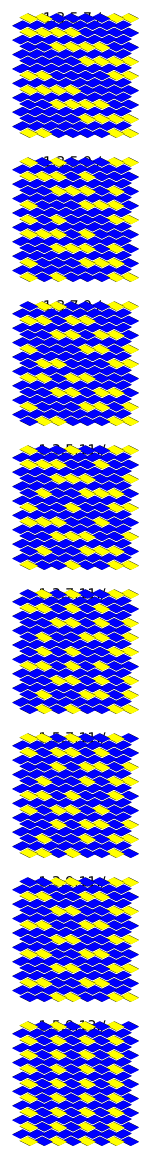

In [15]:
using Luxor
@svg begin
    left = 4
    right = 0
    fontsize(14)
    origin(0,0)
    tiles = Partition(2inch, 16inch, 2inch, 2inch)
    for (pos, i) in tiles
        origin()
        translate(pos)
        if (oddsymmtypes[left+1][tiles.currentrow]*evensymmtypes[right+1][tiles.currentcol] != -2)
            setcolor("black")
            label(makeLabel(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :])), 
                :N, O-(0, 0.6inch))
            grid= fillGrid(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :]), ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
         end
     end
    end 2inch 16inch

1.3.5.7.9./
1.3.5.7.11./
1.3.5.9.11./
1.3.5.9.13./
1.3.7.9.13./


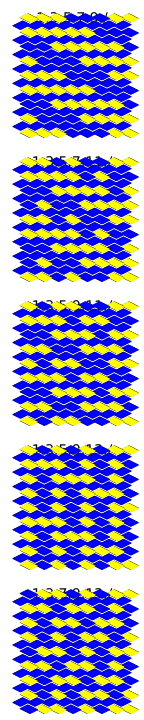

In [16]:
using Luxor
@svg begin
    left = 5
    right = 0
    fontsize(14)
    origin(0,0)
    tiles = Partition(2inch, 10inch, 2inch, 2inch)
    for (pos, i) in tiles
        origin()
        translate(pos)
        if (oddsymmtypes[left+1][tiles.currentrow]*evensymmtypes[right+1][tiles.currentcol] != -2)
            setcolor("black")
            label(makeLabel(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :])), 
                :N, O-(0, 0.6inch))
            grid= fillGrid(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :]), ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
         end
     end
    end 2inch 10inch

1.3.5.7.9.11./
1.3.5.7.9.13./
1.3.5.7.11.13./
1.3.5.9.11.13./


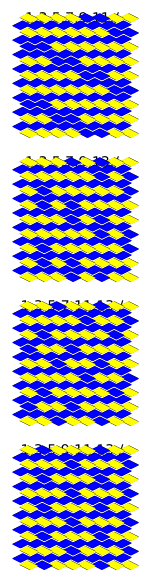

In [17]:
using Luxor
@svg begin
    left = 6
    right = 0
    fontsize(14)
    origin(0,0)
    tiles = Partition(2inch, 8inch, 2inch, 2inch)
    for (pos, i) in tiles
        origin()
        translate(pos)
        if (oddsymmtypes[left+1][tiles.currentrow]*evensymmtypes[right+1][tiles.currentcol] != -2)
            setcolor("black")
            label(makeLabel(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :])), 
                :N, O-(0, 0.6inch))
            grid= fillGrid(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :]), ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
         end
     end
    end 2inch 8inch

1.3.5.7.9.11.13./


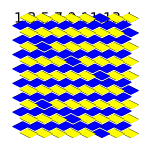

In [18]:
using Luxor
@svg begin
    left = 7
    right = 0
    fontsize(14)
    origin(0,0)
    tiles = Partition(2inch, 2inch, 2inch, 2inch)
    for (pos, i) in tiles
        origin()
        translate(pos)
        if (oddsymmtypes[left+1][tiles.currentrow]*evensymmtypes[right+1][tiles.currentcol] != -2)
            setcolor("black")
            label(makeLabel(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :])), 
                :N, O-(0, 0.6inch))
            grid= fillGrid(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :]), ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
         end
     end
    end 2inch 2inch

1.3.5.7.9.11.13.15./


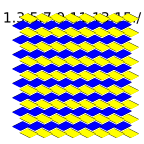

In [19]:
using Luxor
@svg begin
    left = 8
    right = 0
    fontsize(14)
    origin(0,0)
    tiles = Partition(2inch, 2inch, 2inch, 2inch)
    for (pos, i) in tiles
        origin()
        translate(pos)
        if (oddsymmtypes[left+1][tiles.currentrow]*evensymmtypes[right+1][tiles.currentcol] != -2)
            setcolor("black")
            label(makeLabel(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :])), 
                :N, O-(0, 0.6inch))
            grid= fillGrid(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :]), ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
         end
     end
    end 2inch 2inch

4 plus 4 spots, for completeness

1./2.


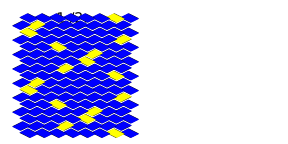

In [20]:
using Luxor
@svg begin
    left = 1
    right = 1
    fontsize(14)
    origin(0,0)
    tiles = Partition(2inch, 2inch, 2inch, 2inch)
    for (pos, i) in tiles
        origin()
        translate(pos-(1inch,0))
        if (oddsymmtypes[left+1][tiles.currentrow]*evensymmtypes[right+1][tiles.currentcol] != -2)
            setcolor("black")
            label(makeLabel(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :])), 
                :N, O-(0, 0.6inch))
            grid= fillGrid(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :]), ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
         end
     end
    end 4inch 2inch

8 plus 4 spots, 10 total:

1.3./2.
1.3./4.
1.3./6.
1.3./8.
1.5./2.
1.5./4.
1.5./6.
1.5./8.
1.7./2.
1.7./4.
1.7./6.
1.7./8.
1.9./2.
1.9./4.
1.9./6.
1.9./8.


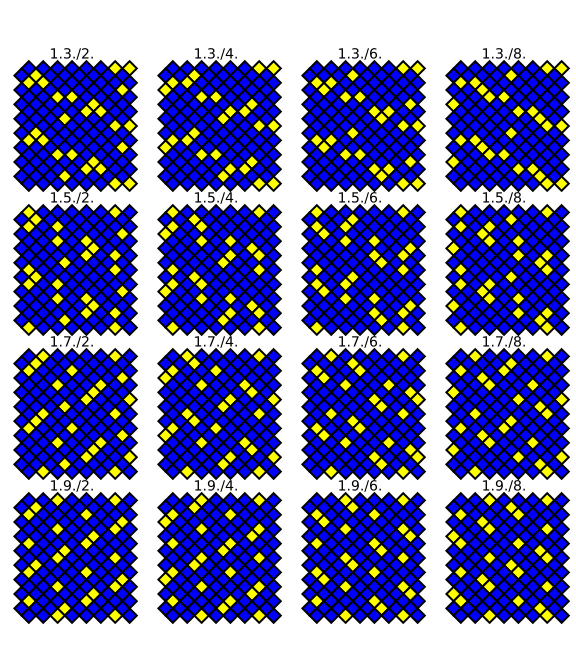

In [78]:
using Luxor
@svg begin
    left = 2
    right = 1
    fontsize(14)
    origin(0,0)
    tiles = Partition(8inch, 8inch, 2inch, 2inch)
    for (pos, i) in tiles
        origin()
        translate(pos)
#        if (oddsymmtypes[left+1][tiles.currentrow]*evensymmtypes[right+1][tiles.currentcol] != -2)
            setcolor("black")
            label(makeLabel(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :])), 
                :N, O-(0, 0.6inch))
            grid= fillGrid(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :]), ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.65inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
#         end
     end
end 8inch 9inch

12 plus 4 spots, 10 total:  not interesting


In [ ]:
using Luxor
@svg begin
    left = 3
    right = 1
    fontsize(14)
    origin(0,0)
    tiles = Partition(4inch, 10inch, 2inch, 2inch)
    for (pos, i) in tiles
        origin()
        translate(pos)
        if (oddsymmtypes[left+1][tiles.currentrow]*evensymmtypes[right+1][tiles.currentcol] != -2)
            setcolor("black")
            label(makeLabel(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :])), 
                :N, O-(0, 0.6inch))
            grid= fillGrid(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :]), ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
         end
     end
    end 4inch 10inch

16 plus 4 spots, 13 total

In [ ]:
using Luxor
@svg begin
    left = 4
    right = 1
    fontsize(14)
    origin(0,0)
    tiles = Partition(4inch, 16inch, 2inch, 2inch)
    for (pos, i) in tiles
        origin()
        translate(pos)
        if (oddsymmtypes[left+1][tiles.currentrow]*evensymmtypes[right+1][tiles.currentcol] != -2)
            setcolor("black")
            label(makeLabel(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :])), 
                :N, O-(0, 0.6inch))
            grid= fillGrid(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :]), ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
         end
     end
    end 4inch 16inch

20 plus 4 spots, 10 total:  not interesting


In [ ]:
using Luxor
@svg begin
    left = 5
    right = 1
    fontsize(14)
    origin(0,0)
    tiles = Partition(4inch, 10inch, 2inch, 2inch)
    for (pos, i) in tiles
        origin()
        translate(pos)
        if (oddsymmtypes[left+1][tiles.currentrow]*evensymmtypes[right+1][tiles.currentcol] != -2)
            setcolor("black")
            label(makeLabel(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :])), 
                :N, O-(0, 0.6inch))
            grid= fillGrid(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :]), ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
         end
     end
    end 4inch 10inch

24 plus 4 spots, 6 total

In [ ]:
using Luxor
@svg begin
    left = 6
    right = 1
    fontsize(14)
    origin(0,0)
    tiles = Partition(4inch, 8inch, 2inch, 2inch)
    for (pos, i) in tiles
        origin()
        translate(pos)
        if (oddsymmtypes[left+1][tiles.currentrow]*evensymmtypes[right+1][tiles.currentcol] != -2)
            setcolor("black")
            label(makeLabel(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :])), 
                :N, O-(0, 0.6inch))
            grid= fillGrid(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :]), ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
         end
     end
    end 4inch 8inch

28 plus 4 spots, for completeness

In [ ]:
using Luxor
@svg begin
    left = 7
    right = 1
    fontsize(14)
    origin(0,0)
    tiles = Partition(2inch, 2inch, 2inch, 2inch)
    for (pos, i) in tiles
        origin()
        translate(pos-(1inch,0))
        if (oddsymmtypes[left+1][tiles.currentrow]*evensymmtypes[right+1][tiles.currentcol] != -2)
            setcolor("black")
            label(makeLabel(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :])), 
                :N, O-(0, 0.6inch))
            grid= fillGrid(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :]), ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
         end
     end
    end 4inch 2inch

8 plus 8 spots, 12 total

In [ ]:
using Luxor
@svg begin
    left = 2
    right = 2
    fontsize(14)
    origin(0,0)
    tiles = Partition(8inch, 8inch, 2inch, 2inch)
    for (pos, i) in tiles
        origin()
        translate(pos)
        if (tiles.currentrow >= tiles.currentcol) || (oddsymmtypes[left+1][tiles.currentrow]*evensymmtypes[right+1][tiles.currentcol] != -1)
            setcolor("black")
            label(makeLabel(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :])), 
                :N, O-(0, 0.6inch))
            grid= fillGrid(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :]), ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
         end
     end
    end 8inch 8inch

24 plus 8 spots, 12 total


In [ ]:
using Luxor
@svg begin
    left = 6
    right = 2
    fontsize(14)
    origin(0,0)
    tiles = Partition(8inch, 8inch, 2inch, 2inch)
    for (pos, i) in tiles
        origin()
        translate(pos)
        if (tiles.currentrow >= tiles.currentcol) || (oddsymmtypes[left+1][tiles.currentrow]*evensymmtypes[right+1][tiles.currentcol] != -1)
            setcolor("black")
            label(makeLabel(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :])), 
                :N, O-(0, 0.6inch))
            grid= fillGrid(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :]), ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
         end
     end
    end 8inch 8inch

12 plus 8 spots, 34 total

In [ ]:
using Luxor
@svg begin
    left = 3
    right = 2
    fontsize(14)
    origin(0,0)
    tiles = Partition(16inch, 10inch, 2inch, 2inch)
    for (pos, i) in tiles
        origin()
        translate(pos)
        if (oddsymmtypes[left+1][tiles.currentrow]*evensymmtypes[right+1][tiles.currentcol] != -2)
            setcolor("black")
            label(makeLabel(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :])), 
                :N, O-(0, 0.6inch))
            grid= fillGrid(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :]), ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
         end
     end
    end 16inch 10inch

20 plus 8 spots, 34 total

In [ ]:
using Luxor
@svg begin
    left = 5
    right = 2
    fontsize(14)
    origin(0,0)
    tiles = Partition(16inch, 10inch, 2inch, 2inch)
    for (pos, i) in tiles
        origin()
        translate(pos)
        if (oddsymmtypes[left+1][tiles.currentrow]*evensymmtypes[right+1][tiles.currentcol] != -2)
            setcolor("black")
            label(makeLabel(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :])), 
                :N, O-(0, 0.6inch))
            grid= fillGrid(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :]), ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
         end
     end
    end 16inch 10inch

16 plus 8 spots, 52 total

In [ ]:
using Luxor
@svg begin
    left = 4
    right = 2
    fontsize(14)
    origin(0,0)
    tiles = Partition(16inch, 16inch, 2inch, 2inch)
    for (pos, i) in tiles
        origin()
        translate(pos)
        if (oddsymmtypes[left+1][tiles.currentrow]*evensymmtypes[right+1][tiles.currentcol] != -2)
            setcolor("black")
            label(makeLabel(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :])), 
                :N, O-(0, 0.6inch))
            grid= fillGrid(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :]), ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
         end
     end
    end 16inch 16inch

12 plus 12 spots, 29 total

If odd has no symmetry, also need to use reverse of even

In [ ]:
using Luxor
@svg begin
    left = 3
    right = 3
    fontsize(14)
    origin(0,0)
    tiles = Partition(14inch, 10inch, 2inch, 2inch)
    for (pos, i) in tiles
        origin()
        translate(pos)
        if (oddsymmtypes[left+1][tiles.currentrow] ==0) || (evensymmtypes[right+1][tiles.currentcol] != 1000)
            setcolor("black")
            label(makeLabel(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :])), 
                :N, O-(0, 0.6inch))
            grid= fillGrid(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :]), ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
         end
     end
    end 14inch 10inch

20 plus 12 spots, 29 total

In [ ]:
using Luxor
@svg begin
    left = 5
    right = 3
    fontsize(14)
    origin(0,0)
    tiles = Partition(14inch, 10inch, 2inch, 2inch)
    for (pos, i) in tiles
        origin()
        translate(pos)
        if (oddsymmtypes[left+1][tiles.currentrow] ==0) || (evensymmtypes[right+1][tiles.currentcol] != 1000)
            setcolor("black")
            label(makeLabel(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :])), 
                :N, O-(0, 0.6inch))
            grid= fillGrid(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :]), ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
         end
     end
    end 14inch 10inch

16 plus 12 spots, 79 total

 Shift unless one parity has mirror and the other parity has glide.  If odd has no symmetry, also need to use reverse of even.

In [ ]:
using Luxor
@svg begin
    left = 4
    right = 3
    fontsize(14)
    origin(0,0)
    tiles = Partition(28inch, 16inch, 2inch, 2inch)
    for (pos, i) in tiles
        origin()
        translate(pos)
        if (oddsymmtypes[left+1][tiles.currentrow]*evensymmtypes[right+1][tiles.currentcol] != -2) &&
            ((oddsymmtypes[left+1][tiles.currentrow] ==0) || (evensymmtypes[right+1][tiles.currentcol] < 1000))
            setcolor("black")
            label(makeLabel(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :])), 
                :N, O-(0, 0.6inch))
            grid= fillGrid(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :]), ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
         end
     end
    end 28inch 16inch

16 plus 16 spots, 48 total, this is going to be the tricky one!

 Swap takes the place of shift, unless glide/mirror combination produces reflection.  If odd has no symmetry, also need to use reverse of even.  Also, two bracelets which are colorchanges of each other are redundant except for one case.

In [ ]:
using Luxor
@svg begin
    left = 4
    right = 4
    fontsize(14)
    origin(0,0)
    tiles = Partition(18inch, 16inch, 2inch, 2inch)
    for (pos, i) in tiles
        origin()
        translate(pos)
              if ((tiles.currentrow >= tiles.currentcol) || 
                    (oddsymmtypes[left+1][tiles.currentrow]*evensymmtypes[right+1][tiles.currentcol] != -1))  &&
            ((oddsymmtypes[left+1][tiles.currentrow] ==0) || (evensymmtypes[right+1][tiles.currentcol] < 1000)) &&
            ((tiles.currentrow != 4) || (tiles.currentcol ==3))
            setcolor("black")
            label(makeLabel(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :])), 
                :N, O-(0, 0.6inch))
            grid= fillGrid(8, oddbracelets[left+1][tiles.currentrow, :], 
                    reverse(evenbracelets[right+1][tiles.currentcol, :]), ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
         end
     end
    end 18inch 16inch